In [1]:
import random
import timeit
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import scipy.special

In [2]:
def bubble_sort(nums):
    # We set swapped to True so the loop looks runs at least once
    swapped = True
    while swapped:
        swapped = False
        for i in range(len(nums) - 1):
            if nums[i] > nums[i + 1]:
                # Swap the elements
                nums[i], nums[i + 1] = nums[i + 1], nums[i]
                # Set the flag to True so we'll loop again
                swapped = True

In [3]:
def selection_sort(nums):
    # This value of i corresponds to how many values were sorted
    for i in range(len(nums)):
        # We assume that the first item of the unsorted segment is the smallest
        lowest_value_index = i
        # This loop iterates over the unsorted items
        for j in range(i + 1, len(nums)):
            if nums[j] < nums[lowest_value_index]:
                lowest_value_index = j
        # Swap values of the lowest unsorted element with the first unsorted
        # element
        nums[i], nums[lowest_value_index] = nums[lowest_value_index], nums[i]

In [4]:
def insertion_sort(nums):
    # Start on the second element as we assume the first element is sorted
    for i in range(1, len(nums)):
        item_to_insert = nums[i]
        # And keep a reference of the index of the previous element
        j = i - 1
        # Move all items of the sorted segment forward if they are larger than
        # the item to insert
        while j >= 0 and nums[j] > item_to_insert:
            nums[j + 1] = nums[j]
            j -= 1
        # Insert the item
        nums[j + 1] = item_to_insert


In [5]:
def heapify(nums, heap_size, root_index):
    # Assume the index of the largest element is the root index
    largest = root_index
    left_child = (2 * root_index) + 1
    right_child = (2 * root_index) + 2

    # If the left child of the root is a valid index, and the element is greater
    # than the current largest element, then update the largest element
    if left_child < heap_size and nums[left_child] > nums[largest]:
        largest = left_child

    # Do the same for the right child of the root
    if right_child < heap_size and nums[right_child] > nums[largest]:
        largest = right_child

    # If the largest element is no longer the root element, swap them
    if largest != root_index:
        nums[root_index], nums[largest] = nums[largest], nums[root_index]
        # Heapify the new root element to ensure it's the largest
        heapify(nums, heap_size, largest)


def heap_sort(nums):
    n = len(nums)

    # Create a Max Heap from the list
    # The 2nd argument of range means we stop at the element before -1 i.e.
    # the first element of the list.
    # The 3rd argument of range means we iterate backwards, reducing the count
    # of i by 1
    for i in range(n, -1, -1):
        heapify(nums, n, i)

    # Move the root of the max heap to the end of
    for i in range(n - 1, 0, -1):
        nums[i], nums[0] = nums[0], nums[i]
        heapify(nums, i, 0)

In [6]:
def merge(left_list, right_list):
    sorted_list = []
    left_list_index = right_list_index = 0

    # We use the list lengths often, so its handy to make variables
    left_list_length, right_list_length = len(left_list), len(right_list)

    for _ in range(left_list_length + right_list_length):
        if left_list_index < left_list_length and right_list_index < right_list_length:
            # We check which value from the start of each list is smaller
            # If the item at the beginning of the left list is smaller, add it
            # to the sorted list
            if left_list[left_list_index] <= right_list[right_list_index]:
                sorted_list.append(left_list[left_list_index])
                left_list_index += 1
            # If the item at the beginning of the right list is smaller, add it
            # to the sorted list
            else:
                sorted_list.append(right_list[right_list_index])
                right_list_index += 1

        # If we've reached the end of the of the left list, add the elements
        # from the right list
        elif left_list_index == left_list_length:
            sorted_list.append(right_list[right_list_index])
            right_list_index += 1
        # If we've reached the end of the of the right list, add the elements
        # from the left list
        elif right_list_index == right_list_length:
            sorted_list.append(left_list[left_list_index])
            left_list_index += 1

    return sorted_list


def merge_sort(nums):
    # If the list is a single element, return it
    if len(nums) <= 1:
        return nums

    # Use floor division to get midpoint, indices must be integers
    mid = len(nums) // 2

    # Sort and merge each half
    left_list = merge_sort(nums[:mid])
    right_list = merge_sort(nums[mid:])

    # Merge the sorted lists into a new one
    return merge(left_list, right_list)

In [3]:
# There are different ways to do a Quick Sort partition, this implements the
# Hoare partition scheme. Tony Hoare also created the Quick Sort algorithm.
def partition(nums, low, high):
    # We select the middle element to be the pivot. Some implementations select
    # the first element or the last element. Sometimes the median value becomes
    # the pivot, or a random one. There are many more strategies that can be
    # chosen or created.
    pivot = nums[(low + high) // 2]
    i = low - 1
    j = high + 1
    while True:
        i += 1
        while nums[i] < pivot:
            i += 1

        j -= 1
        while nums[j] > pivot:
            j -= 1

        if i >= j:
            return j

        # If an element at i (on the left of the pivot) is larger than the
        # element at j (on right right of the pivot), then swap them
        nums[i], nums[j] = nums[j], nums[i]


def quick_sort(nums):
    # Create a helper function that will be called recursively
    def _quick_sort(items, low, high):
        if low < high:
            # This is the index after the pivot, where our lists are split
            split_index = partition(items, low, high)
            _quick_sort(items, low, split_index)
            _quick_sort(items, split_index + 1, high)

    _quick_sort(nums, 0, len(nums) - 1)

## Timing

In [2]:
def microbench(callable_obj, plt, label, n_max = 100, st = 1):
    n_min = 10 
    st = 1
    sz = 5 # iteraciones del benchmark

    t_quick_2 = list()
    for n in range(n_min, n_max, st):
        v = random.sample(range(1, 1000000), n)
        t_quick_2.append(timeit.timeit(lambda: callable_obj(v), number = sz))

    plt.plot(list(range(n_min, n_max)), t_quick_2, label= label + '; step = ' + str(st))
    plt.xlabel('n')
    plt.ylabel('costo')
    plt.legend()
    
    return plt

In [9]:
n_min = 10
n_max = 1000
st = 10
iteraciones = 10 # iteraciones del benchmark

t_bubble_1 = list()
for n in range(n_min, n_max, st):
    suma = 0
    for i in range(1, iteraciones):
        v = random.sample(range(1, 1000000), n)
        suma += timeit.timeit(lambda: selection_sort(v), number = 1)
    promedio = suma / iteraciones
    t_bubble_1.append(promedio)

t_sele_1 = list()
for n in range(n_min, n_max, st):
    suma = 0
    for i in range(1, iteraciones):
        v = random.sample(range(1, 1000000), n)
        suma += timeit.timeit(lambda: insertion_sort(v), number = 1)
    promedio = suma / iteraciones
    t_sele_1.append(promedio)

t_insert_1 = list()
for n in range(n_min, n_max, st):
    suma = 0
    for i in range(1, iteraciones):
        v = random.sample(range(1, 1000000), n)
        suma += timeit.timeit(lambda: bubble_sort(v), number = 1)
    promedio = suma / iteraciones
    t_insert_1.append(promedio)

t_merge_1 = list()
for n in range(n_min, n_max, st):
    suma = 0
    for i in range(1, iteraciones):
        v = random.sample(range(1, 1000000), n)
        suma += timeit.timeit(lambda: merge_sort(v), number = 1)
    promedio = suma / iteraciones
    t_merge_1.append(promedio)

t_quick_1 = list()
for n in range(n_min, n_max, st):
    suma = 0
    for i in range(1, iteraciones):
        v = random.sample(range(1, 1000000), n)
        suma += timeit.timeit(lambda: quick_sort(v), number = 1)
    promedio = suma / iteraciones
    t_quick_1.append(promedio)

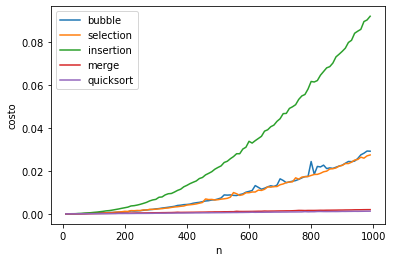

In [10]:
eje_x = list(range(n_min, n_max, st))
plt.plot(eje_x, t_bubble_1, label = 'bubble')
plt.xlabel('n')
plt.ylabel('costo')


plt.plot(eje_x, t_sele_1, label = 'selection')
plt.plot(eje_x, t_insert_1, label = 'insertion')
plt.plot(eje_x, t_merge_1, label = 'merge')
plt.plot(eje_x, t_quick_1, label = 'quicksort')
plt.legend()

# Guía 1, ejercicio 3

In [19]:
x = np.array(range(2, 100))

y1 = np.full((x.size), 1)
y2 = x**x
y3 = np.log2(np.log2(x))
y4 = x+1
y5 = np.full((x.size), np.sqrt(2))
y6 = sp.special.factorial(x)
y7 = x**2
y8 = np.log2(x)
y9 = np.log2(sp.special.factorial(x))
y10= np.sqrt(x)
y11 = (np.log(x))**2
y12 = x*np.log(x)
y13 = 1/x
y14 = np.log2(x**2)
y15 = 1 + (np.sin(x))**2
y16 = 2**x

## A: constantes

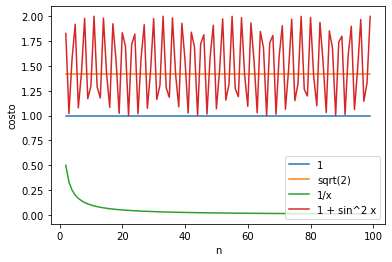

In [12]:
plt.plot(x, y1, label='1')
plt.plot(x, y5, label='sqrt(2)')
plt.plot(x, y13, label='1/x')
plt.plot(x, y15, label='1 + sin^2 x')

plt.xlabel('n')
plt.ylabel('costo')
plt.legend(loc = 4)

## B

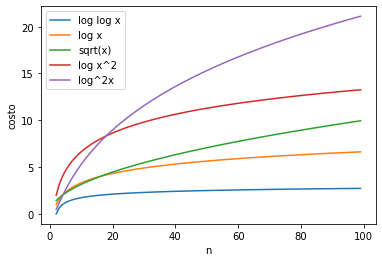

In [13]:
plt.plot(x, y3, label='log log x')
plt.plot(x, y8, label='log x')
plt.plot(x, y10, label='sqrt(x)')
plt.plot(x, y14, label='log x^2')
plt.plot(x, y11, label='log^2x')

plt.xlabel('n')
plt.ylabel('costo')
plt.legend()

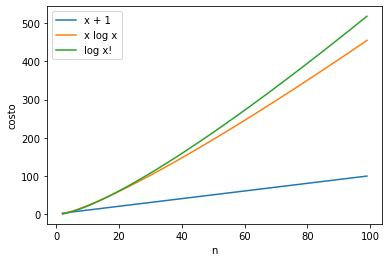

In [14]:
plt.plot(x, y4, label='x + 1')
plt.plot(x, y12, label='x log x')
plt.plot(x, y9, label='log x!')

plt.xlabel('n')
plt.ylabel('costo')
plt.legend()

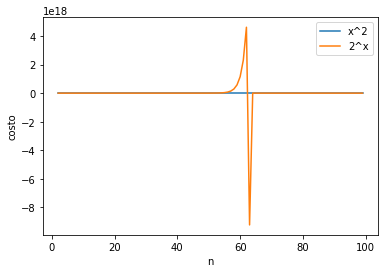

In [20]:
plt.plot(x, y7, label='x^2')

plt.xlabel('n')
plt.ylabel('costo')
plt.legend()

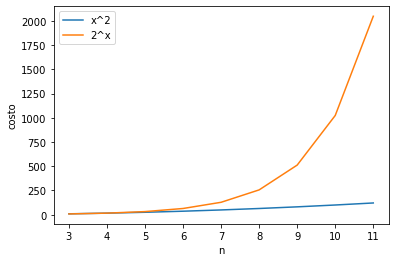

In [24]:
plt.plot(x[1:10], y7[1:10], label='x^2')
plt.plot(x[1:10], y16[1:10], label='2^x')

plt.xlabel('n')
plt.ylabel('costo')
plt.legend()

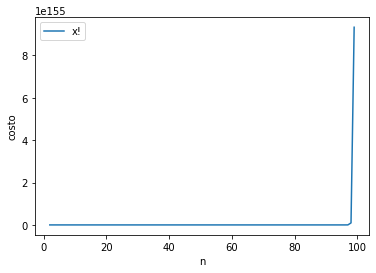

In [16]:
plt.plot(x, y6, label='x!')

plt.xlabel('n')
plt.ylabel('costo')
plt.legend()

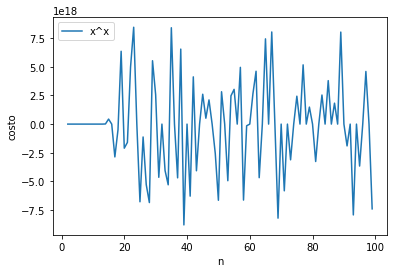

In [17]:
plt.plot(x, y2, label='x^x')

plt.xlabel('n')
plt.ylabel('costo')
plt.legend()

## Compilado de funciones

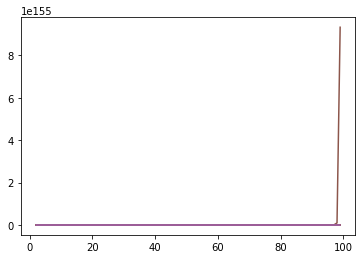

In [18]:
plt.plot(x, y1, label='1')
plt.plot(x, y2, label='x^x')
plt.plot(x, y3, label='log log x')
plt.plot(x, y4, label='x + 1')
plt.plot(x, y5, label='sqrt(2)')
plt.plot(x, y6, label='x!')
plt.plot(x, y7, label='x^2')
plt.plot(x, y8, label='log x')
plt.plot(x, y9, label='log x!')
plt.plot(x, y10, label='sqrt(x)')
plt.plot(x, y11, label='log^2x')
plt.plot(x, y12, label='x log x')
plt.plot(x, y13, label='1/x')
plt.plot(x, y14, label='log x^2')
plt.plot(x, y15, label='1 + sin^2(x)')